<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M3_lab04_nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

13.036526014534045 0.735842644206149


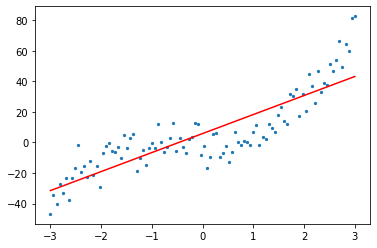

In [ ]:
# data generation
x = np.linspace(-3, 3, 100)
y = 2.1 * x**3 + 2.1 * x**2 + 1.4 * x + 0.9
y = y + np.random.randn(100) * 7.2
plt.scatter(x, y, s=5)

# linear model
lrg = LinearRegression()
lrg.fit(x.reshape(-1,1), y)
y_pred = lrg.predict(x.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = lrg.score(x.reshape(-1,1), y)
print(rmse, r2)

a, b = lrg.coef_, lrg.intercept_
xx = np.linspace(-3,3, 100)
yy = a * xx + b
plt.plot(xx, yy, c='r')

[12.43710442  2.25034502] -1.0480154404739022
11.489697885058794 0.794810007282259


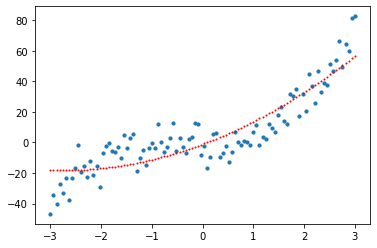

In [ ]:
# nonlinear (degree 2)
poly_f = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_f.fit_transform(x.reshape(-1,1))
# x[:5], x_poly[:5]
lrg = LinearRegression()
lrg.fit(x_poly, y)
print(lrg.coef_, lrg.intercept_)
y_pred = lrg.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = lrg.score(x_poly, y)
print(rmse, r2)

plt.scatter(x, y, s=10)
plt.scatter(x, y_pred, c='r', s=1)

In [ ]:
lrg.coef_, lrg.intercept_

(array([12.43710442,  2.25034502]), -1.0480154404739022)

In [ ]:
x2 = np.c_[x, x**2]; x2[:5]

array([[-3.        ,  9.        ],
       [-2.93939394,  8.64003673],
       [-2.87878788,  8.28741965],
       [-2.81818182,  7.94214876],
       [-2.75757576,  7.60422406]])

In [ ]:
x_poly[:5]  # the same as the above (we can do it using a function)

array([[-3.        ,  9.        ],
       [-2.93939394,  8.64003673],
       [-2.87878788,  8.28741965],
       [-2.81818182,  7.94214876],
       [-2.75757576,  7.60422406]])

In [ ]:
# nonlinear (degree 3)
poly_f = PolynomialFeatures(degree = 3, include_bias = False)
x_poly = poly_f.fit_transform(x.reshape(-1,1))
x[:5], x_poly[:5]

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 array([[ -3.        ,   9.        , -27.        ],
        [ -2.93939394,   8.64003673, -25.3964716 ],
        [ -2.87878788,   8.28741965, -23.85772324],
        [ -2.81818182,   7.94214876, -22.38241923],
        [ -2.75757576,   7.60422406, -20.96922392]]))

[1.03821708 2.25034502 2.06938091] -1.0480154404739075
7.505195463646039 0.9124486247733932


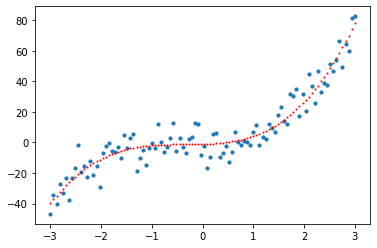

In [ ]:
lrg = LinearRegression()
lrg.fit(x_poly, y)
print(lrg.coef_, lrg.intercept_)
y_pred = lrg.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = lrg.score(x_poly, y)
print(rmse, r2)

plt.scatter(x, y, s=10)
plt.scatter(x, y_pred, c='r', s=1)

9.341142668946748 0.8643752446427235


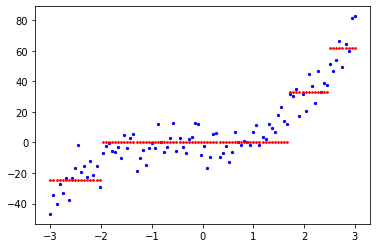

In [ ]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtrg = DecisionTreeRegressor(max_depth=2)
dtrg.fit(x.reshape(-1,1), y)
y_pred = dtrg.predict(x.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = dtrg.score(x.reshape(-1,1), y)
print(rmse, r2)

plt.scatter(x, y, c='b', s=5)
plt.scatter(x, y_pred, c='r', s=3)

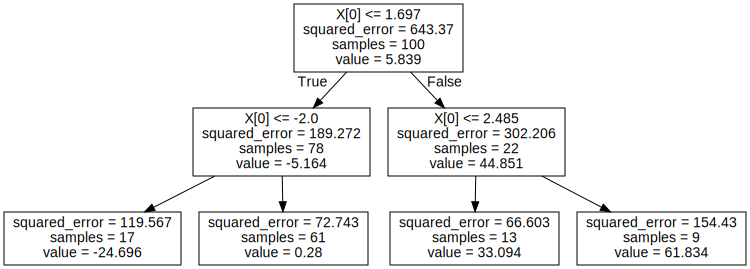

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    dtrg,
    out_file = "./dtr.dot"
    )
with open("./dtr.dot") as f:
    dot_graph = str(open("./dtr.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

5.435432061451941 0.9540794478925829


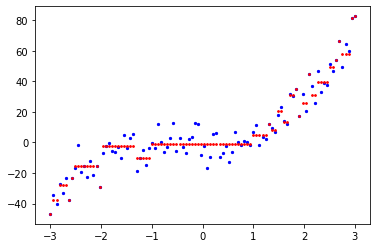

In [ ]:
# change max_depth=5
dtrg = DecisionTreeRegressor(max_depth=5)
dtrg.fit(x.reshape(-1,1), y)
y_pred = dtrg.predict(x.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = dtrg.score(x.reshape(-1,1), y)
print(rmse, r2)

plt.scatter(x, y, c='b', s=5)
plt.scatter(x, y_pred, c='r', s=3)

5.228741576923641 0.9575054422913474


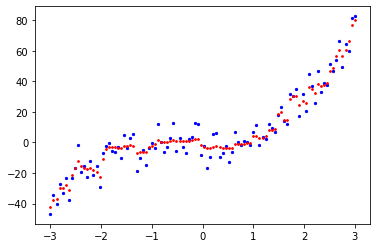

In [ ]:
# randomforest regressor
from sklearn.ensemble import RandomForestRegressor
rfrg = RandomForestRegressor(n_estimators=200, max_depth=5)
rfrg.fit(x.reshape(-1,1), y)
y_pred = rfrg.predict(x.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = rfrg.score(x.reshape(-1,1), y)
print(rmse, r2)

plt.scatter(x, y, c='b', s=5)
plt.scatter(x, y_pred, c='r', s=3)

6.112109547744559 0.9419340926932004


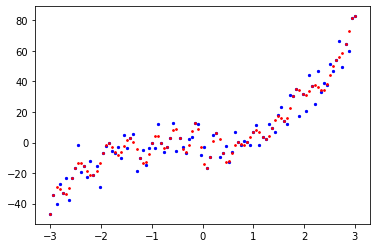

In [ ]:
# svm regressor
from sklearn.svm import SVR
svrg = SVR(C=10000, kernel='rbf', gamma=10)
svrg.fit(x.reshape(-1,1), y)
y_pred = svrg.predict(x.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = svrg.score(x.reshape(-1,1), y)
print(rmse, r2)

plt.scatter(x, y, c='b', s=5)
plt.scatter(x, y_pred, c='r', s=3)

# Exercise

In [ ]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
np.r_[np.array([1,2,3]), np.array([4,5,6])]

array([1, 2, 3, 4, 5, 6])